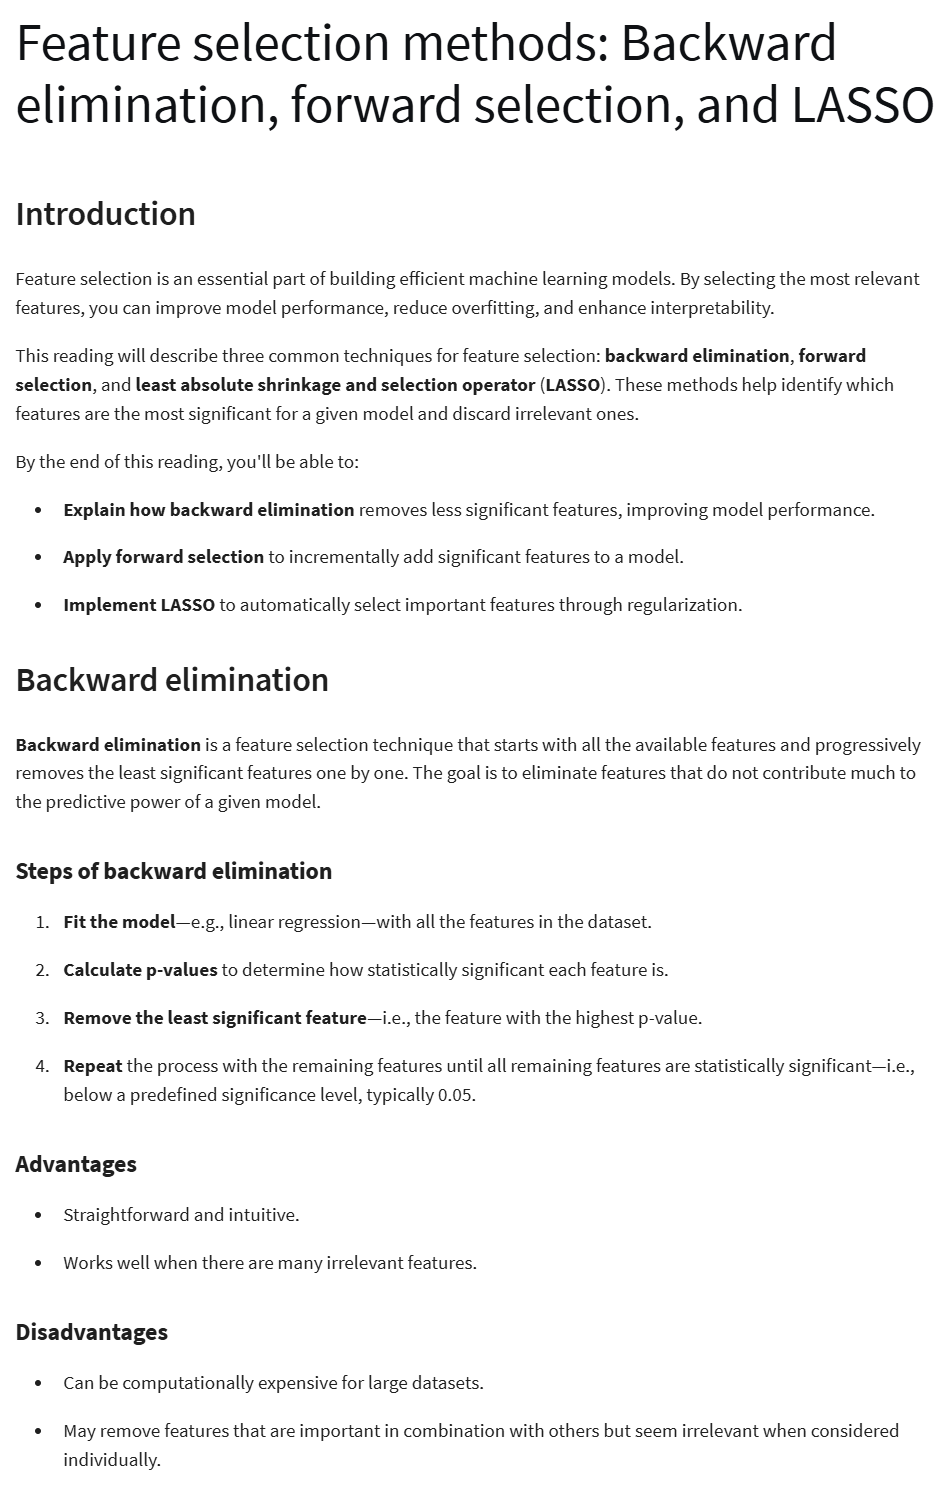

In [4]:
import statsmodels.api as sm, pandas as pd

# Sample dataset
data = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'PrevExamScore': [30, 40, 45, 50, 60, 65, 70, 75, 80, 85],
    'Pass': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

df = pd.DataFrame(data)

# Features and target variable
X = df[['StudyHours', 'PrevExamScore']]
y = df['Pass']

# Sample data: X is the feature matrix, y is the target variable
X = sm.add_constant(X)  # Add a constant (intercept) to the model
model = sm.OLS(y, X).fit()  # Fit an Ordinary Least Squares regression
print(model.summary())  # Display the model summary

                            OLS Regression Results                            
Dep. Variable:                   Pass   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     10.94
Date:                Sat, 12 Apr 2025   Prob (F-statistic):            0.00701
Time:                        11:21:46   Log-Likelihood:               -0.17258
No. Observations:                  10   AIC:                             6.345
Df Residuals:                       7   BIC:                             7.253
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3333      1.464     -0.228

c:\Users\Jamie\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [5]:
# Backward elimination: remove the feature with the highest p-value and refit the model
# Repeat the process until all remaining features have a p-value < 0.05

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Define forward selection function
def forward_selection(X, y):
    remaining_features = set(X.columns)
    selected_features = []
    current_score = 0.0
    best_score = 0.0
    
    while remaining_features:
        scores_with_candidates = []
        for feature in remaining_features:
            features_to_test = selected_features + [feature]
            X_train, X_test, y_train, y_test = train_test_split(X[features_to_test], y, test_size=0.2, random_state=42)
            model = LinearRegression()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            score = r2_score(y_test, y_pred)
            scores_with_candidates.append((score, feature))
        
        # Select the feature with the best score
        scores_with_candidates.sort(reverse=True)
        best_score, best_feature = scores_with_candidates[0]
        
        if current_score < best_score:
            remaining_features.remove(best_feature)
            selected_features.append(best_feature)
            current_score = best_score
        else:
            break
    
    return selected_features

# Apply forward selection
best_features = forward_selection(X, y)
print("Selected features:", best_features)

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Lasso model with alpha (λ) as the regularization parameter
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

# Display the coefficients of the features
print(f"Lasso Coefficients: {lasso_model.coef_}")

Selected features: ['PrevExamScore']
Lasso Coefficients: [0.         0.08153909 0.01180619]


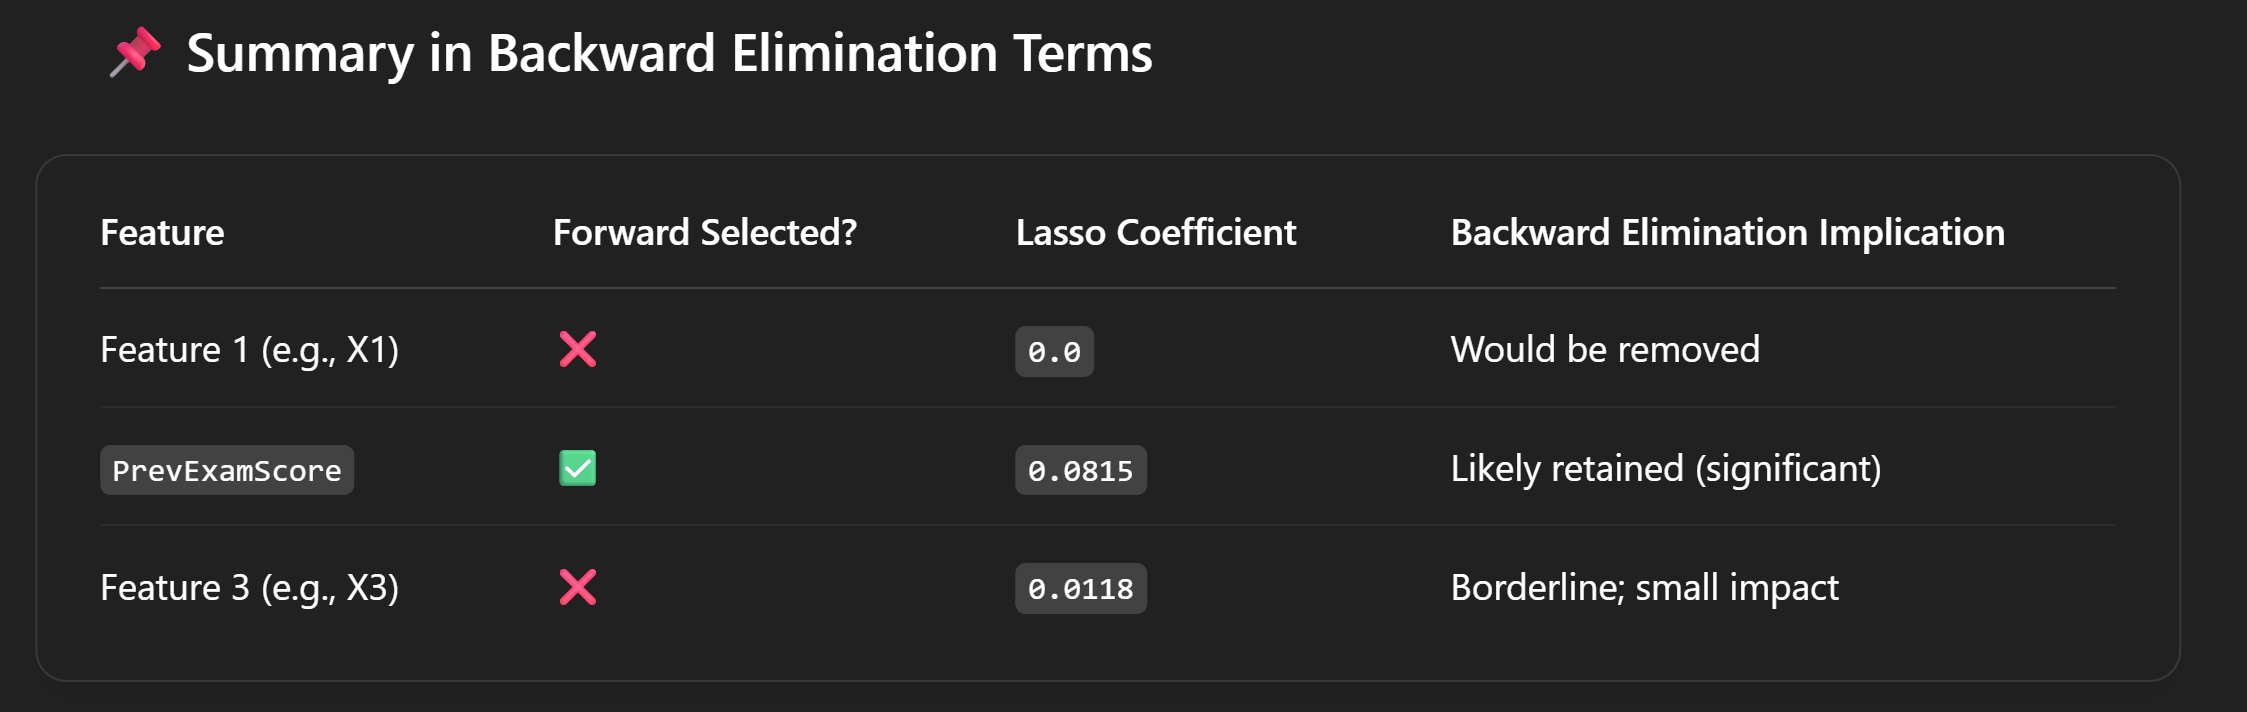